**Authors:** Gabriel Sposito and Thomas Frentzel

**LSTM**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
base = pd.read_csv('AMD 5Y.csv')
base.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$172.80,34730150,$171.75,$173.60,$170.00
1,10/07/2024,$170.97,38379930,$171.08,$172.41,$168.21
2,10/04/2024,$170.90,44640300,$166.533,$171.21,$164.42
3,10/03/2024,$162.85,29598790,$159.71,$166.7894,$159.40
4,10/02/2024,$159.78,24630430,$159.31,$163.10,$158.6689


In [ ]:
# Removing $
base['Close/Last'] = base['Close/Last'].str.replace('$', '')
base['Open'] = base['Open'].str.replace('$', '')
base['High'] = base['High'].str.replace('$', '')
base['Low'] = base['Low'].str.replace('$', '')

# Converting str to float
base['Close/Last'] = base['Close/Last'].astype(float)
base['Open'] = base['Open'].astype(float)
base['High'] = base['High'].astype(float)
base['Low'] = base['Low'].astype(float)

In [ ]:
#Removing nule results
base.dropna()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,172.80,34730150,171.750,173.6000,170.0000
1,10/07/2024,170.97,38379930,171.080,172.4100,168.2100
2,10/04/2024,170.90,44640300,166.533,171.2100,164.4200
3,10/03/2024,162.85,29598790,159.710,166.7894,159.4000
4,10/02/2024,159.78,24630430,159.310,163.1000,158.6689
...,...,...,...,...,...,...
1253,10/15/2019,30.72,42142390,30.700,30.9200,30.1700
1254,10/14/2019,30.53,44818230,29.710,30.6100,29.3800
1255,10/11/2019,29.75,66632450,28.830,30.2000,28.8100
1256,10/10/2019,28.38,41172000,28.520,28.8900,28.0000


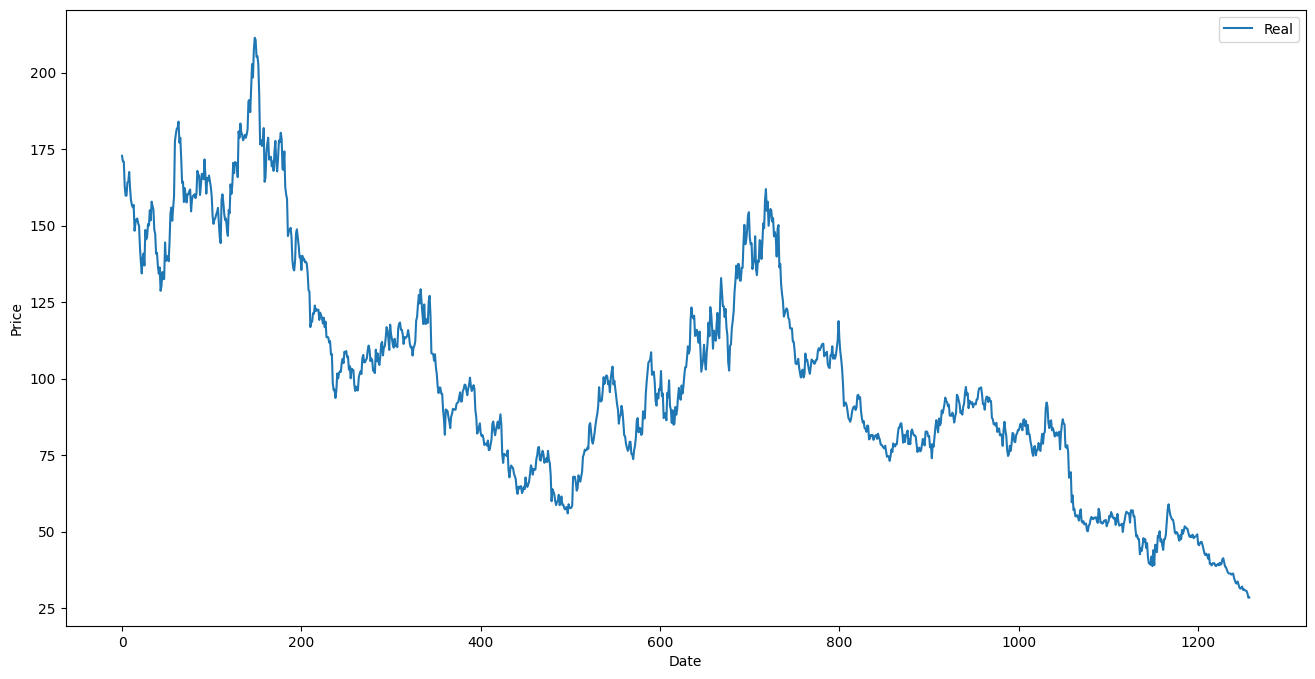

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base['Close/Last'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [ ]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(base['Close/Last']).reshape(-1, 1))

In [ ]:
window_size = 10
forecasters = []
real_value = []
for i in range(window_size, len(base)):
    forecasters.append(scaled_data[i - window_size:i, 0])
    real_value.append(scaled_data[i, 0])

forecasters, real_value = np.array(forecasters), np.array(real_value)
forecasters = np.reshape(forecasters, (forecasters.shape[0], forecasters.shape[1], 1))

In [ ]:
# Separating data between training and testing
X_train, X_test, y_train, y_test = train_test_split(forecasters, real_value, test_size=0.3, shuffle=False)

In [ ]:
# Creating the LSTM model

lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(forecasters.shape[1], 1)))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50, return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.3))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1171 - mean_absolute_error: 0.2748 - val_loss: 0.0077 - val_mean_absolute_error: 0.0721
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0112 - mean_absolute_error: 0.0832 - val_loss: 0.0088 - val_mean_absolute_error: 0.0876
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0070 - mean_absolute_error: 0.0647 - val_loss: 0.0018 - val_mean_absolute_error: 0.0355
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0067 - mean_absolute_error: 0.0625 - val_loss: 0.0012 - val_mean_absolute_error: 0.0281
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0595 - val_loss: 0.0013 - val_mean_absolute_error: 0.0296
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0066 - mean_absolute_error: 0.0603 - val_loss: 0.0014 - val_mean_absolute_error: 0.0312
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0057 - mean_absolute_error: 0.0560 - v

In [ ]:
test_predictions = lstm.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [ ]:
# Transforming test values ​​back to original values
y_orig_test = scaler.inverse_transform(y_test.reshape(-1, 1))

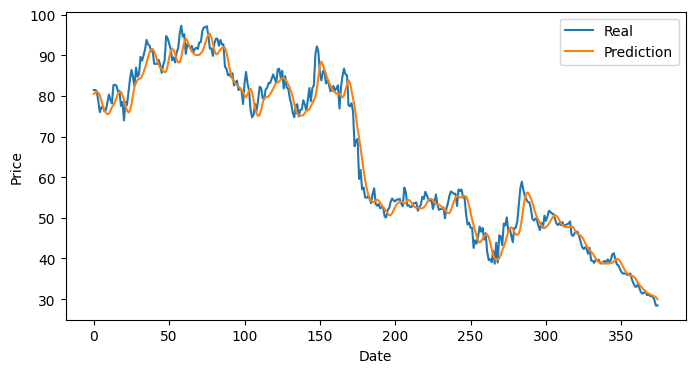

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(y_orig_test)), y_orig_test, label='Real')
plt.plot(range(len(test_predictions)), test_predictions, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#R2 Score
r2 = r2_score(y_orig_test, test_predictions)
print(f'R2 Score: {r2}')

#RMSE
rmse = np.sqrt(np.mean((y_orig_test - test_predictions) ** 2))
print(f'RMSE: {rmse}')

R2 Score: 0.9768185162672243
RMSE: 3.0339595710674048


**ARIMA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [ ]:
base_A = pd.read_csv('AMD 5Y.csv')
base_A.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$172.80,34730150,$171.75,$173.60,$170.00
1,10/07/2024,$170.97,38379930,$171.08,$172.41,$168.21
2,10/04/2024,$170.90,44640300,$166.533,$171.21,$164.42
3,10/03/2024,$162.85,29598790,$159.71,$166.7894,$159.40
4,10/02/2024,$159.78,24630430,$159.31,$163.10,$158.6689


In [ ]:
base_A.dtypes

,0
Date,object
Close/Last,object
Volume,int64
Open,object
High,object
Low,object


In [ ]:
# Removing $
base_A['Close/Last'] = base_A['Close/Last'].str.replace('$', '')
base_A['Open'] = base_A['Open'].str.replace('$', '')
base_A['High'] = base_A['High'].str.replace('$', '')
base_A['Low'] = base_A['Low'].str.replace('$', '')

# Converting str to float
base_A['Close/Last'] = base_A['Close/Last'].astype(float)
base_A['Open'] = base_A['Open'].astype(float)
base_A['High'] = base_A['High'].astype(float)
base_A['Low'] = base_A['Low'].astype(float)

In [ ]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base_A = base_A.replace([np.inf, -np.inf], np.nan)
base_A = base_A.dropna()

In [ ]:
base_A.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,172.80,34730150,171.750,173.6000,170.0000
1,10/07/2024,170.97,38379930,171.080,172.4100,168.2100
2,10/04/2024,170.90,44640300,166.533,171.2100,164.4200
3,10/03/2024,162.85,29598790,159.710,166.7894,159.4000
4,10/02/2024,159.78,24630430,159.310,163.1000,158.6689


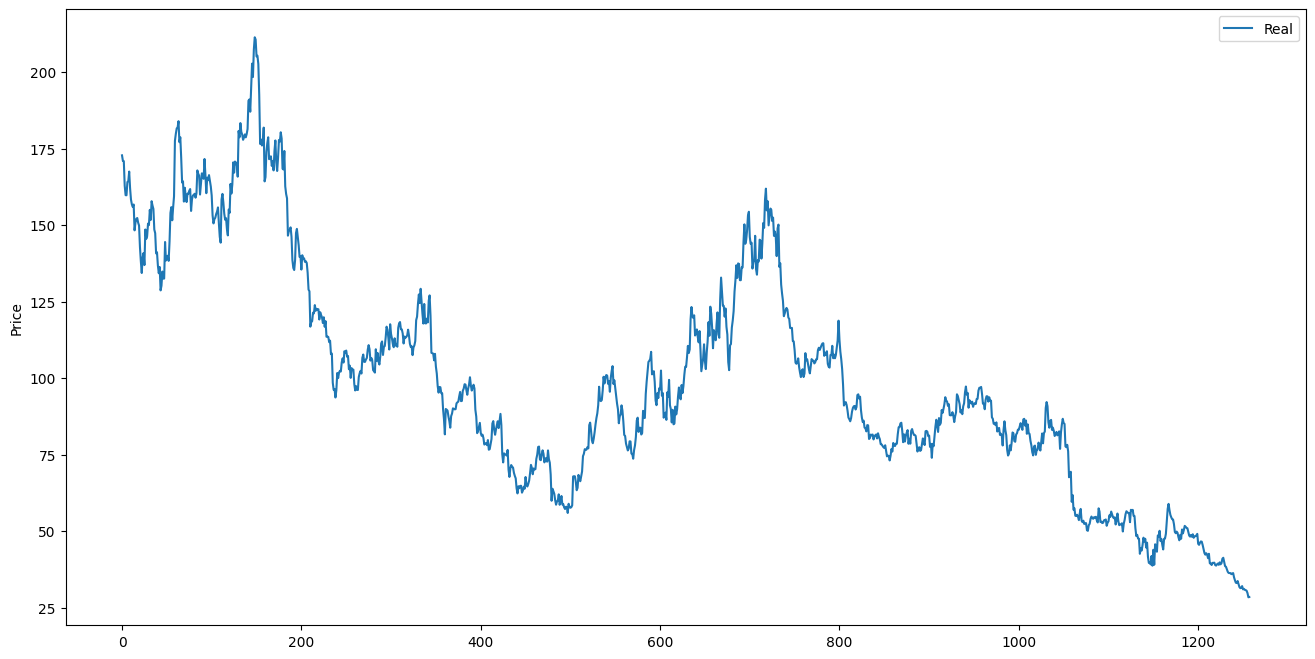

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base_A['Close/Last'], label='Real')
plt.ylabel('Price')
plt.legend()

In [ ]:
# Addfuller for CCI
result = adfuller(base_A['Close/Last'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.6542515373735875
p-value: 0.4548240758665104


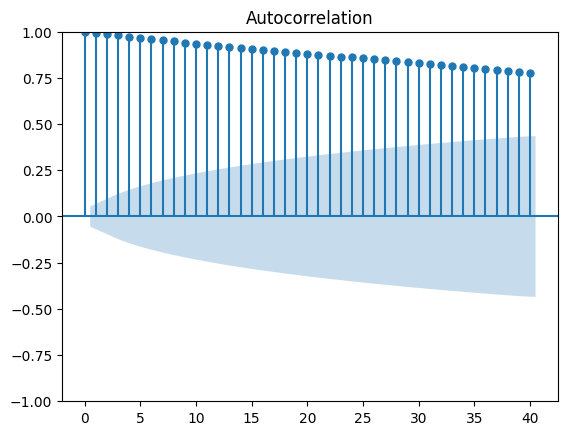

In [ ]:
plot_acf(base_A['Close/Last'], lags=40)
plt.show()

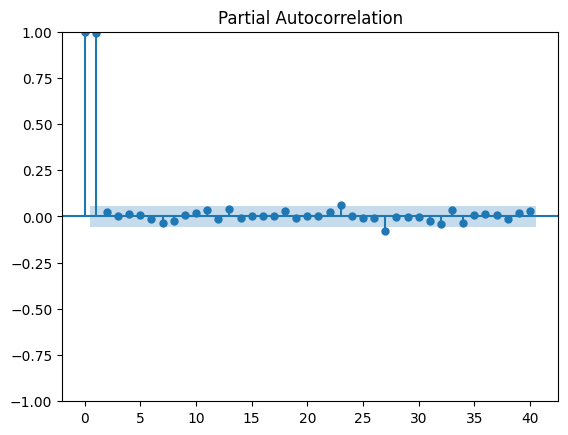

In [ ]:
plot_pacf(base_A['Close/Last'], lags=40)
plt.show()

In [ ]:
X = base_A['Close/Last'].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
forecasts = list()

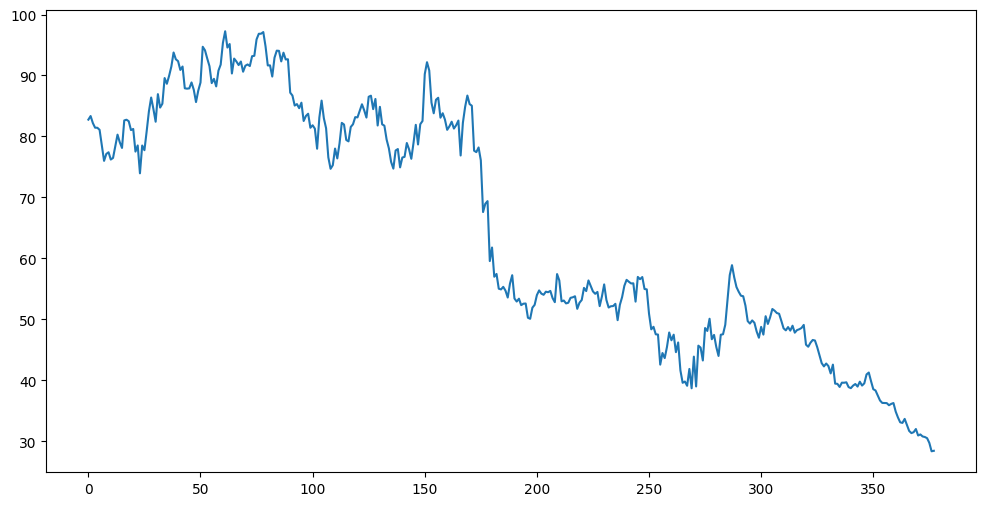

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test)
plt.show()

In [ ]:
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    forecasts.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Expected={yhat}, Observed={obs}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Expected=78.41586411294482, Observed=82.76
Expected=82.8724099127298, Observed=83.35
Expected=83.08258704889835, Observed=82.2
Expected=82.4496244895569, Observed=81.44
Expected=81.27151485524855, Observed=81.43
Expected=81.61130721698582, Observed=81.09
Expected=80.93255997918469, Observed=78.5
Expected=78.71314067579807, Observed=76.0
Expected=75.95225430040485, Observed=77.14
Expected=77.24786228628749, Observed=77.41
Expected=77.2653261916777, Observed=76.22
Expected=76.36783852782892, Observed=76.48
Expected=76.38213135541416, Observed=78.38
Expected=78.41939875227773, Observed=80.3
Expected=80.15601901331085, Observed=79.06
Expected=79.14943490537522, Observed=78.12
Expected=78.10232448662606, Observed=82.63
Expected=82.58350920042231, Observed=82.75
Expected=82.62737822746959, Observed=82.5
Expected=82.61238353751426, Observed=81.05
Expected=80.98754969226185, Observed=81.23
Expected=81.33469733387497, Observed=77.52
Expected=77.49738957471342, Observed=78.53
Expected=78.6608403

In [ ]:
#RMSE
rmse = sqrt(mean_squared_error(test, forecasts))
print(f'RMSE: {rmse}')

#R2 Score
r2 = r2_score(test, forecasts)
print(f'R2 Score: {r2}')

RMSE: 2.1476762648150935
R2 Score: 0.9883665385306893


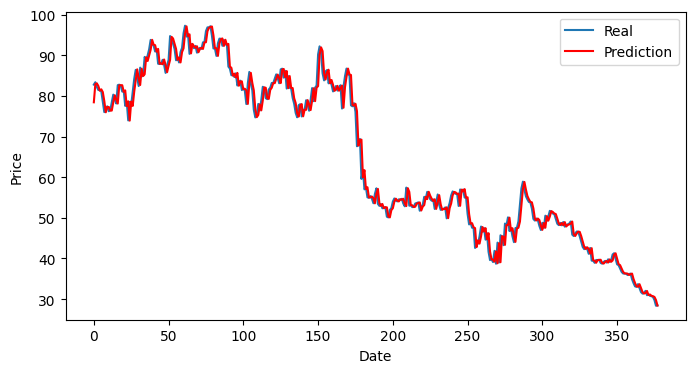

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(test)), test, label='Real')
plt.plot(range(len(forecasts)), forecasts, label='Prediction', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()